### Chebyshev filter design

In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:

import numpy as np
from sclibrary import load_dataset, SCPlot

sc, coordinates, _ = load_dataset("paper")
# create a plot
scplot = SCPlot(sc, coordinates)

Num. of nodes: 7
Num. of edges: 10
Num. of triangles: 3
Shape: (7, 10, 3)
Max Dimension: 2


In [3]:
f0 = np.array([-0.0689, -0.1378, 0.2067, -0.0689, 0.3445, -0.5512, 0.5512, 0.3675, 0.1837, -0.1837])
f = np.array([0.0323, 0.4980, 2.3825, 0.8799, -0.5297, -0.5192, 1.0754, 0.4732, -1.1667, 0.0922])

In [4]:
from sclibrary.filters import ChebyshevFilterDesign

filter = ChebyshevFilterDesign(simplicial_complex=sc)
comp_coeffs = sc.get_component_coefficients(component="gradient")
filter.get_ideal_frequency(component_coeffs=comp_coeffs)

(CVXPY) Jun 24 01:14:02 PM: Encountered unexpected exception importing solver ECOS:
ImportError("dlopen(/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so, 0x0002): tried: '/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (no such file), '/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))")
(CVXPY) Jun 24 01:14:02 PM: Encountered unexpected exception importing solver SCS:
ImportError("dlopen(/Users/irtaza

array([[ 0.62025316,  0.24050633,  0.13924051, -0.37974684, -0.10126582,
        -0.03797468,  0.03797468,  0.02531646,  0.01265823, -0.01265823],
       [ 0.24050633,  0.48101266,  0.27848101,  0.24050633, -0.20253165,
        -0.07594937,  0.07594937,  0.05063291,  0.02531646, -0.02531646],
       [ 0.13924051,  0.27848101,  0.58227848,  0.13924051,  0.30379747,
         0.11392405, -0.11392405, -0.07594937, -0.03797468,  0.03797468],
       [-0.37974684,  0.24050633,  0.13924051,  0.62025316, -0.10126582,
        -0.03797468,  0.03797468,  0.02531646,  0.01265823, -0.01265823],
       [-0.10126582, -0.20253165,  0.30379747, -0.10126582,  0.50632911,
         0.18987342, -0.18987342, -0.12658228, -0.06329114,  0.06329114],
       [-0.03797468, -0.07594937,  0.11392405, -0.03797468,  0.18987342,
         0.69620253,  0.30379747,  0.20253165,  0.10126582, -0.10126582],
       [ 0.03797468,  0.07594937, -0.11392405,  0.03797468, -0.18987342,
         0.30379747,  0.69620253, -0.20253165

[4.53978687e-05 4.53978687e-05 4.53978687e-05 4.53978687e-05
 9.01727506e-01 9.87109235e-01 1.01377802e+00 1.03843106e+00
 9.73971806e-01 1.00002411e+00]


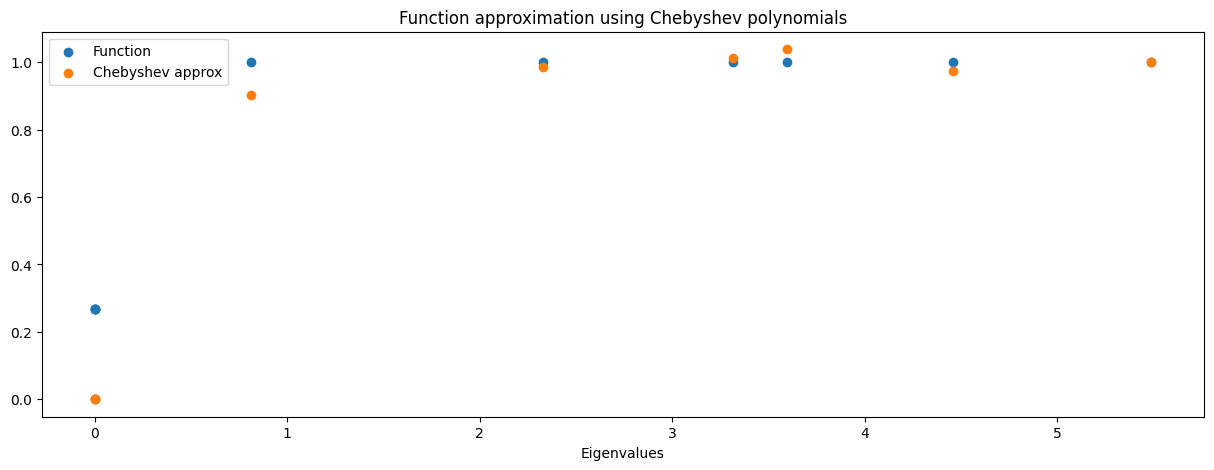

In [5]:
filter.plot_chebyshev_series_approx(p_choice="L1L", n=10, cut_off_frequency=0.1, steep=100)

In [7]:
# apply filter
filter.apply(f=f, p_choice="L1L", component="gradient", L=20, cut_off_frequency=0.1)

Calculating Chebyshev filter approximation for k = 0...
Calculating Chebyshev filter approximation for k = 1...
Calculating Chebyshev filter approximation for k = 2...
Calculating Chebyshev filter approximation for k = 3...
Calculating Chebyshev filter approximation for k = 4...
Calculating Chebyshev filter approximation for k = 5...
Calculating Chebyshev filter approximation for k = 6...
Calculating Chebyshev filter approximation for k = 7...
Calculating Chebyshev filter approximation for k = 8...
Calculating Chebyshev filter approximation for k = 9...
Calculating Chebyshev filter approximation for k = 10...
Calculating Chebyshev filter approximation for k = 11...
Calculating Chebyshev filter approximation for k = 12...
Calculating Chebyshev filter approximation for k = 13...
Calculating Chebyshev filter approximation for k = 14...
Calculating Chebyshev filter approximation for k = 15...
Calculating Chebyshev filter approximation for k = 16...
Calculating Chebyshev filter approximatio

Text(0.5, 1.0, 'Error per filter size')

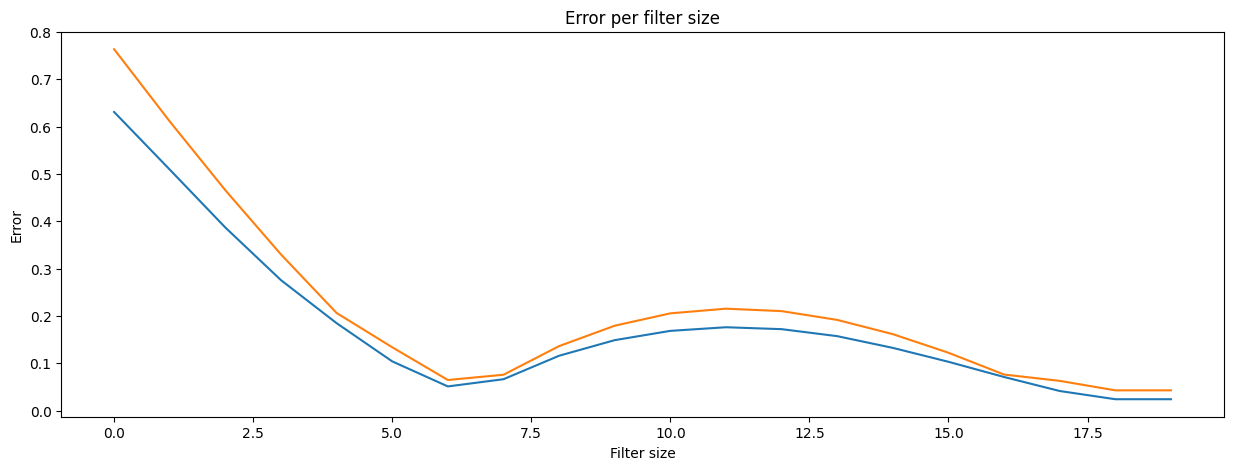

In [8]:
import matplotlib.pyplot as plt

extracted_comp_error = filter.history["extracted_component_error"]
filter_error = filter.history["filter_error"]

# plot the error
plt.figure(figsize=(15, 5))
plt.plot(extracted_comp_error)
plt.plot(filter_error)
plt.xlabel("Filter size")
plt.ylabel("Error")
plt.title("Error per filter size")

In [9]:
filter.history["frequency_responses"][-1]

array([-4.53975746e-05, -1.04267918e+00, -4.53978687e-05,  1.02997907e+00,
        4.53991581e-05,  1.01436892e+00,  9.81581636e-01, -4.53974333e-05,
       -9.87744035e-01,  9.99965219e-01])

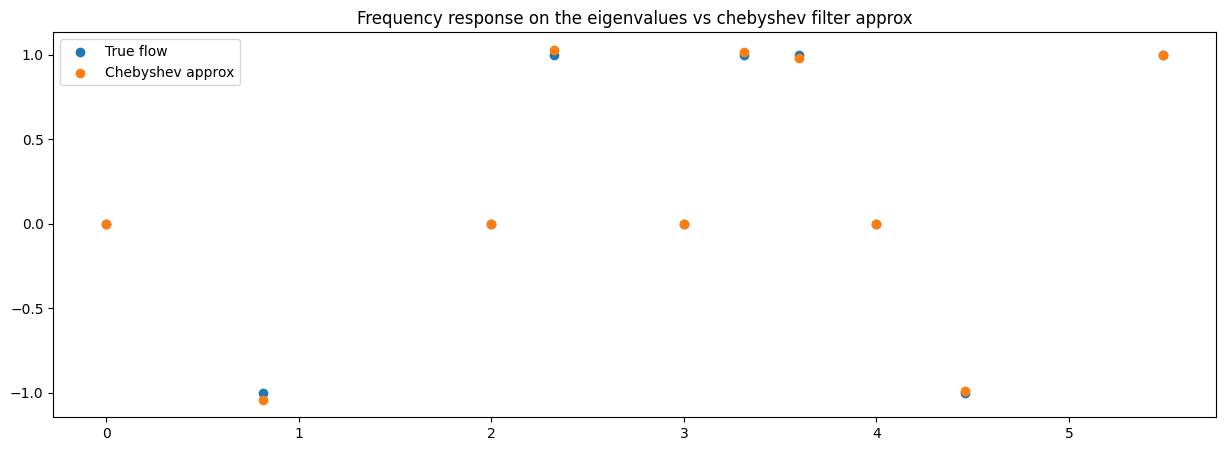

In [10]:
filter.plot_frequency_response_approx(flow=f, component="gradient")

In [11]:
error = filter.history["extracted_component_error"][-1]
print(f"Error: {error}")

Error: 0.023866083861566672
